In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
from scipy.stats import mode
import warnings

In [2]:
from pathlib import Path
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Path.cwd()
red = pd.read_csv('/Users/macmall/Desktop/jobs/personal_projects/wine_analysis/winequality-red.csv')
red

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
red = red.drop(columns = ['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'])                             
red

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [4]:
columns_name = pd.DataFrame(red.columns.str.split(';',12).tolist())

r = []
for i in red:
    r.append(red[i].str.split(';'))

columns = [[0] * 1]* 12
for i in range(12):
    x = []
    for j in r[0]:
        x.append(j[i])
    columns[i] = x

df = pd.DataFrame()
col = [0] * 12
for i in range(12):
    col[i] = columns_name[i].tolist()
    
for i in col:
    i[0] = i[0].lstrip('"')
    i[0] = i[0].rstrip('"')
    
for i in range(len(col)): 
    df[col[i][0]] =  columns[i]
    
# red = ['red'] * len(red)
# df['wine type'] = red
# df
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [6]:
df1 = pd.DataFrame()
for i in df:
    x = []
    for j in df[i]:
        x.append(float(j))
    df1[i] = x

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


#### Units 
1. Fixed acidity: g/L
2. Volatile acidity: g/L
3. Citric acid: g/L
4. Residual sugar: g/L
5. Chlorides: g/L
6. Total sulfur dioxide: mg/L
7. Density: g/mL
8. pH
9. Sulphates: g/L
10. Alcohol: % by Volume

#### Some resuable functions

In [34]:
labels = df1['quality'].unique()
labels = sorted(labels)
for i in range(6):
    labels[i] = int(labels[i])

def create_matrix(arr):
    X = np.array(df1[arr[0]])
    X = X[:,np.newaxis]
    
    for i in arr[1:]:
        var = np.array(df1[i])
        var = var[:,np.newaxis]
        X = np.hstack((X,var))
        
    return X
    
def conf_matrix(mat):
    fig, ax = plt.subplots()
    ax.imshow(mat, cmap = 'OrRd',label = y_test)
    ax.set_xticks(np.arange(len(labels))) # define tick-mark positions
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation = 90) # label ticks with newsgroups
    ax.set_yticklabels(labels) 
    ax.set_xlabel('predicted quality group'), ax.set_ylabel('true quality group')

    for i in range(len(labels)): # Loop over data dimensions and create text annotations:
        for j in range(len(labels)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");
            
y = df1['quality']   

## I. EDA

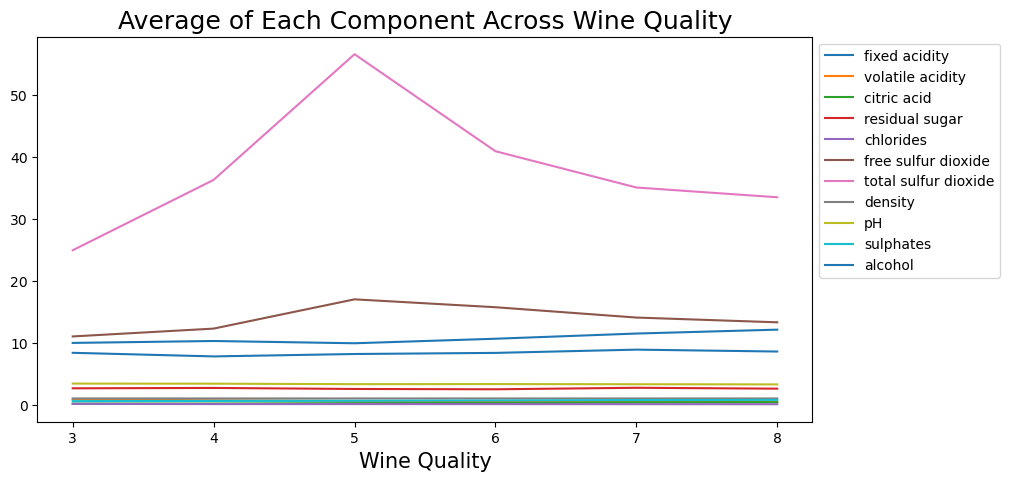

In [9]:
import numpy as np
fig, ax = plt.subplots(figsize= (10,5))

avg = df1.groupby('quality').mean()

ax.plot(avg,label = avg.columns.tolist())
ax.set_xlabel('Wine Quality',fontsize = 15)
ax.set_title('Average of Each Component Across Wine Quality',fontsize = 18)
ax.legend(bbox_to_anchor = (1,1));

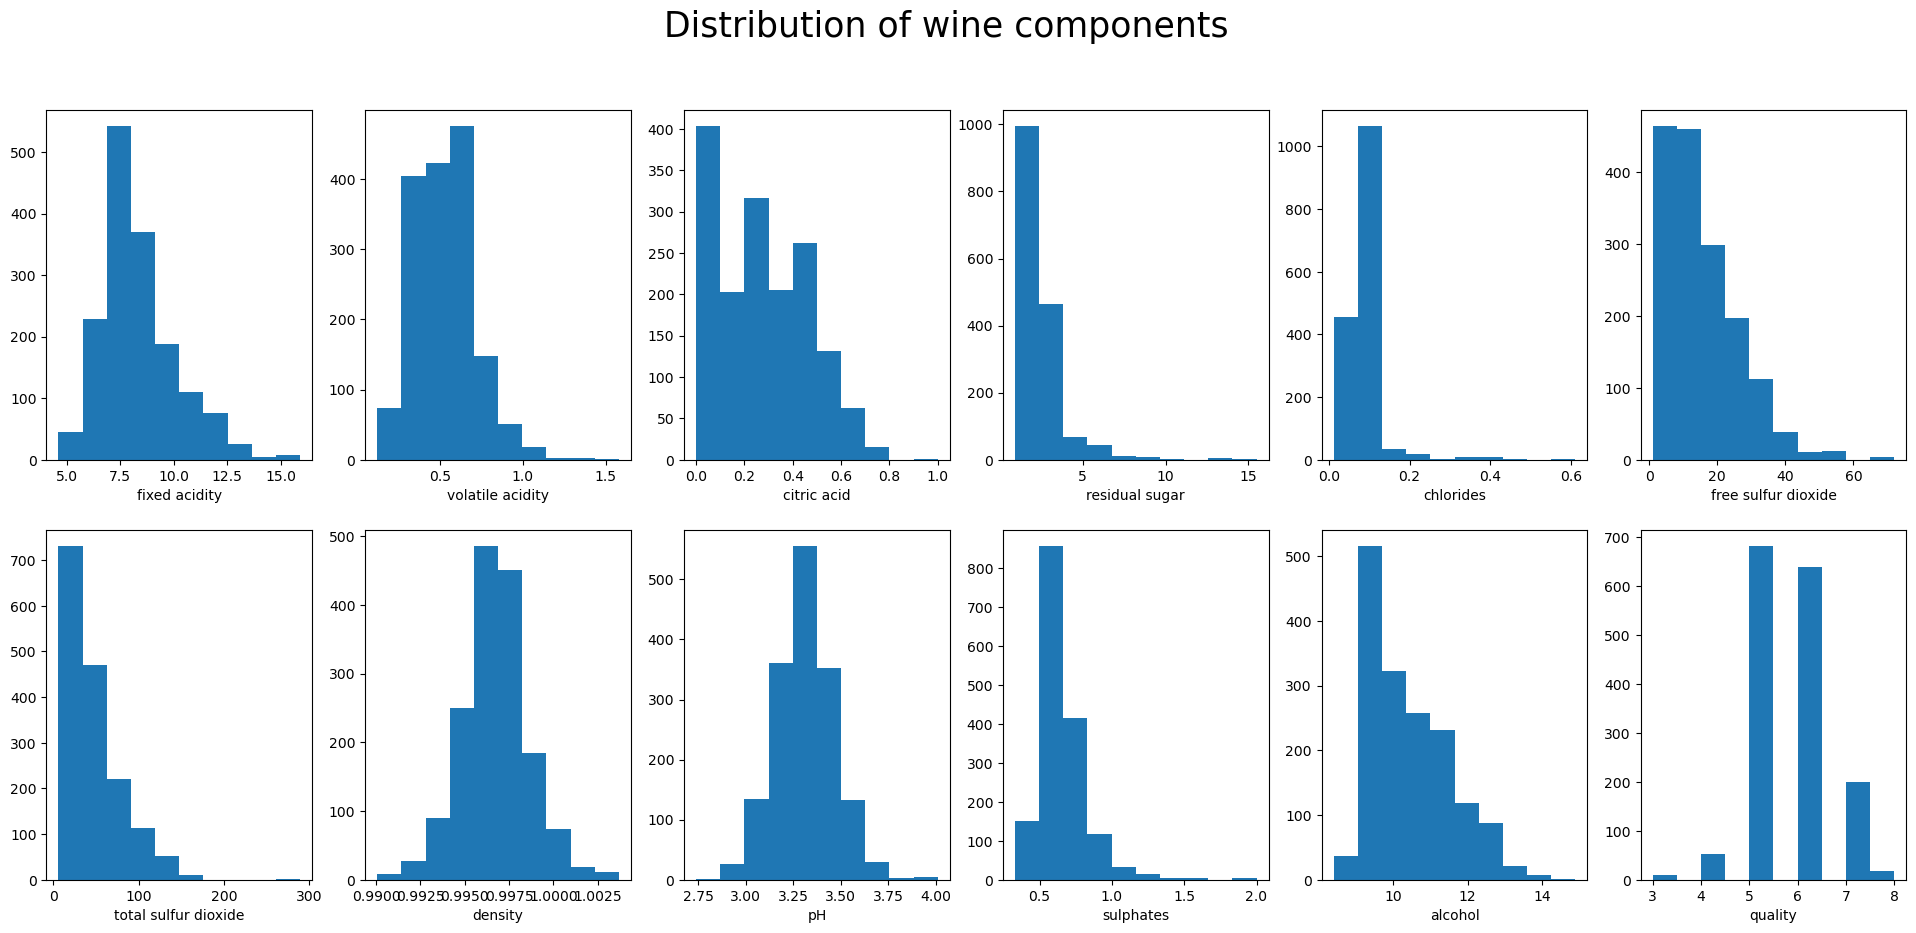

In [10]:
fig, ax = plt.subplots(2,6,figsize = (24,10))

col = np.array(df1.columns.tolist())
col = col.reshape(2,6)

for i,z in zip(range(2),col):
    for j,w in zip(range(6),col[i]):  
        ax[i][j].hist(df1[w], bins = 10)
        ax[i][j].set_xlabel(w)
fig.suptitle('Distribution of wine components',fontsize = 25);
# df1.hist(figsize=(15,10))

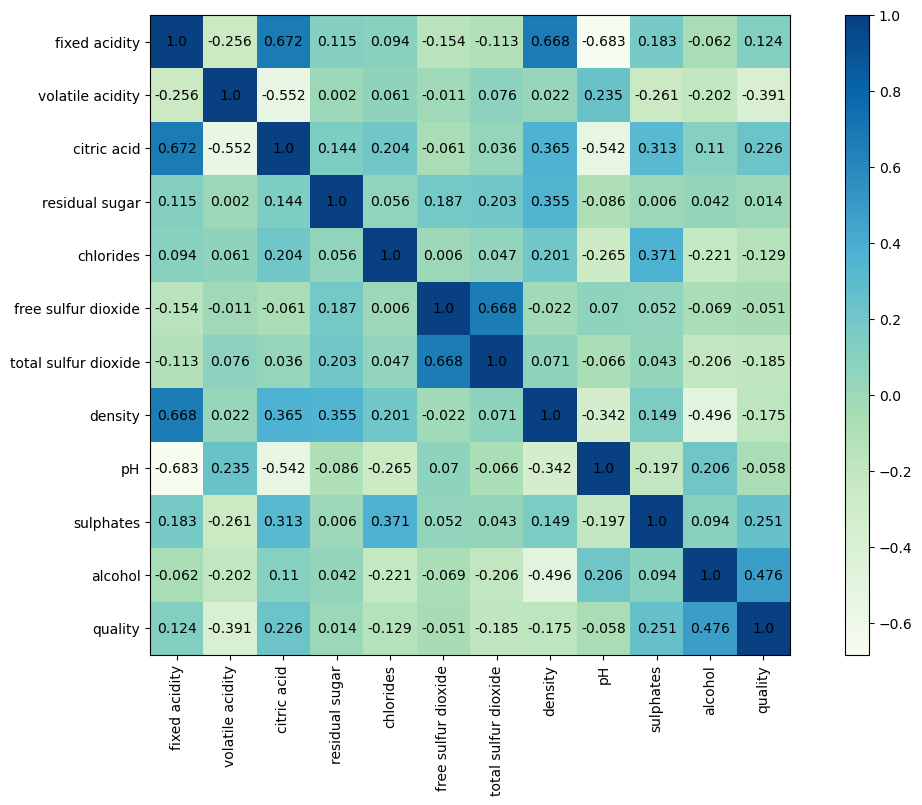

In [11]:
corr = df1.corr()
fig,ax = plt.subplots(figsize = (12,8));
plt.imshow(corr, cmap = 'GnBu')

col = col.reshape(12)
ax.set_xticks(range(0,12))
ax.set_yticks(range(0,12))
ax.set_xticklabels(col, rotation = 90)
ax.set_yticklabels(col)

col = col.reshape(12)
for i in range(len(col)):
    for j in range(len(col)):
        text = ax.text(j, i, round(corr[col[j]][i],3), ha="center", va="center", color="k");
    
    
plt.subplots_adjust(bottom=0.1, right=1.25, top=0.9)
ax = plt.axes([1, 0.1, 0.02, 0.8])
plt.colorbar(cax = ax);


In [12]:
pos_corr = corr[corr != corr.max()].max().max()
neg_corr = corr.min().min()

print('highest positive correlation is', round(pos_corr,3), 'and highest negative correlation is', round(neg_corr,3))    #0.6717


highest positive correlation is 0.672 and highest negative correlation is -0.683


In [13]:
pos, neg = [],[]
for i in corr:
    for j in range(len(corr[i])):
        if corr[i][j] == pos_corr:
            pos.append(corr.columns[j])
            pos.append(i)
    break
        
for i in corr:
    for j in range(len(corr[i])):
        if corr[i][j] == neg_corr:
            neg.append(corr.columns[j])
            neg.append(i)
    break     
pos, neg 

(['citric acid', 'fixed acidity'], ['pH', 'fixed acidity'])

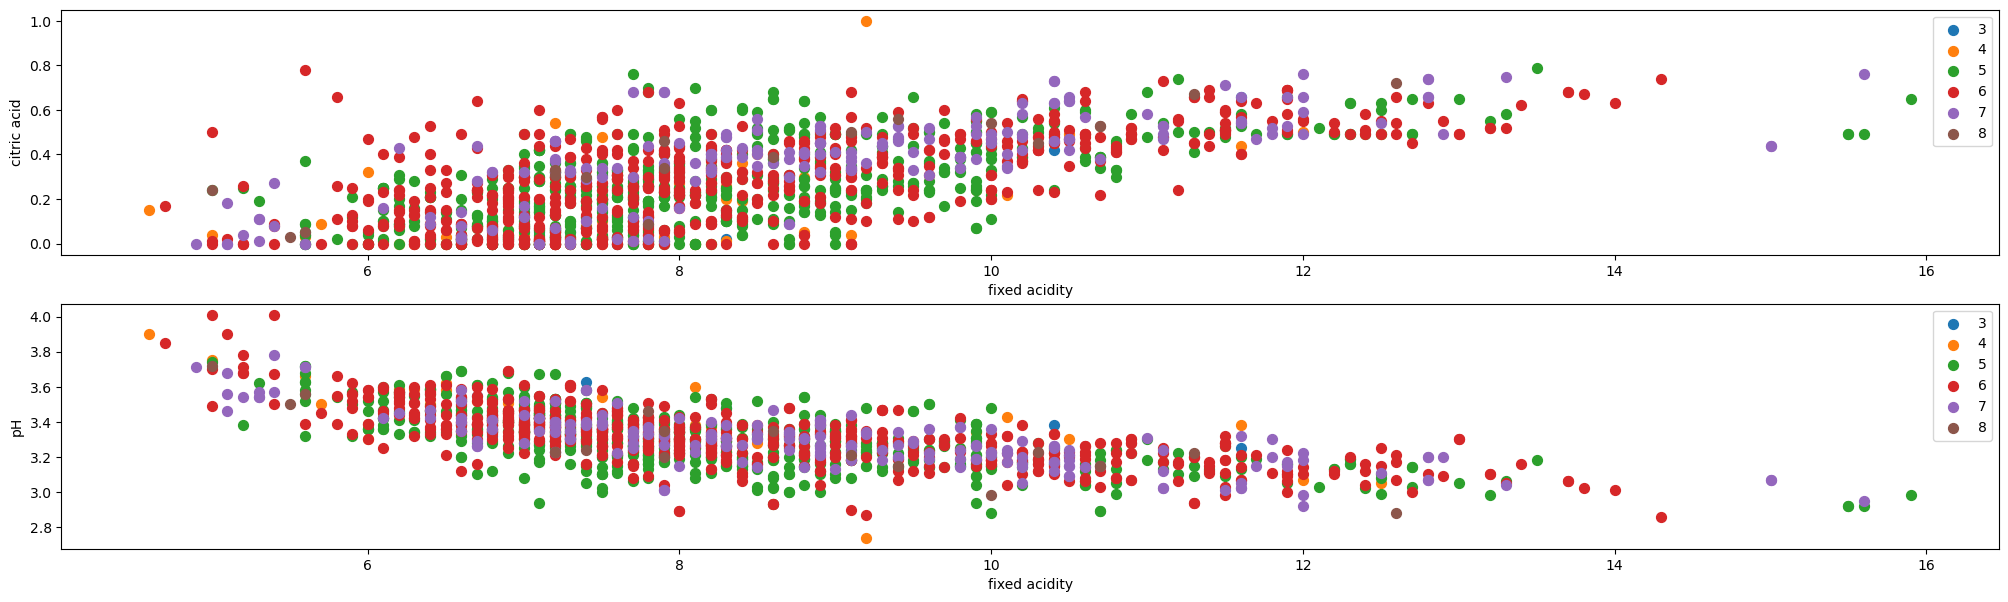

In [14]:
fig, ax = plt.subplots(2,figsize = (25,7))

for i in labels:
    ax[0].scatter(df1[df1['quality'] == i]['fixed acidity'],df1[df1['quality'] == i]['citric acid'],s = 50,label = i)
for i in labels:
    ax[1].scatter(df1[df1['quality'] == i]['fixed acidity'],df1[df1['quality'] == i]['pH'],s= 50, label = i)
    
ax[0].set_xlabel('fixed acidity')
ax[0].set_ylabel('citric acid')
ax[0].legend();

ax[1].set_xlabel('fixed acidity')
ax[1].set_ylabel('pH')
ax[1].legend();


#### Use SMOTE to balance the category

In [15]:
smote = SMOTE()

pos.reverse()
neg.reverse()

X_1 = create_matrix(pos)
X_2 = create_matrix(neg)

X_1, y_fit = smote.fit_resample(X_1, y)
X_2, y_fit = smote.fit_resample(X_2, y)


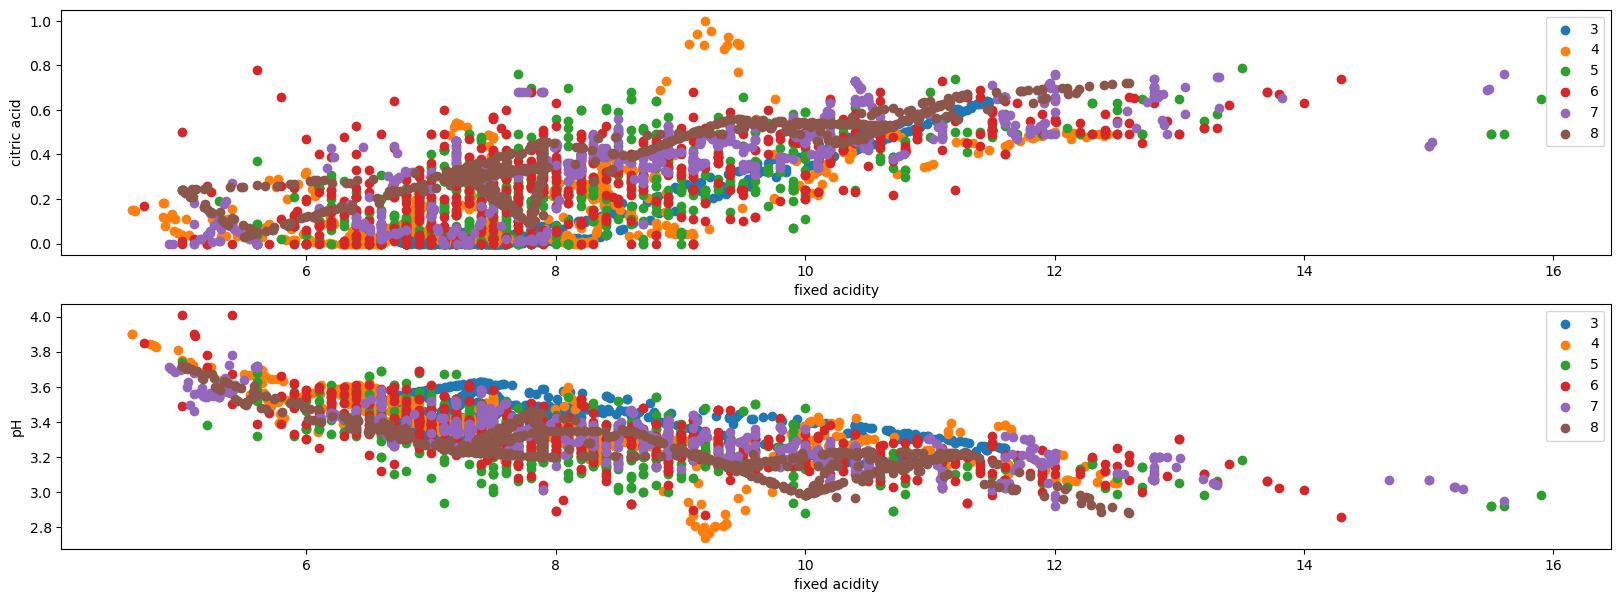

In [16]:
fig, ax = plt.subplots(2,figsize = (20,7))

for i in labels:
    ax[0].scatter(X_1[y_fit == i][:,0],X_1[y_fit == i][:,1],label = i)
    
    
for i in labels:
    ax[1].scatter(X_2[y_fit == i][:,0],X_2[y_fit == i][:,1],label = i)
    
ax[0].set_xlabel('fixed acidity')
ax[0].set_ylabel('citric acid')
ax[0].legend();
    
ax[1].set_xlabel('fixed acidity')
ax[1].set_ylabel('pH')
ax[1].legend();


Two highest correlated relationships are:
- positive: fixed acidity and citric acid
- negative:  fixed acidity and pH

# II. Classification

https://www.wineenthusiast.com/basics/how-to-taste/good-wine-tasting-components/

tannin: https://www.masterclass.com/articles/learn-about-wine-what-are-tannins

Wine's five keys Structural Elements:
- Sweetness: The amount of residual sugar. Different from fruity
- Tannin: the drying feeling in your mouth that sucks your cheeks in
    - Tannins are substances found mainly in plants, bark, and leaves that create a drying, rubbing sensation on your tongue
- Acidity: mouthwatering sensation that makes you crave for another sip
- Alcohol: cool-climate wines tend to have less than warm-climate wines
- Body: residual sugar, alcohol and tannin determine the weight of the wine

- "The collaborative effort of all these [body components] leads up to determine whether you're drinking a light-, medium-, or full-bodied wine" 

- Since we do not have tannin element, I would like to subtitude acidity which is an important component for making good wine.

- I will use the ML classification method to predict the label for new observations. Here, I use residual sugar, fixed acidity, and alcohol amount to predict which quality group that they are in.

- In particular, since our predictors are continous random variables with the assumption of being independently normally distributed, I decided to use Gaussian Naive Bayes and I will use Scikit-Learn to help with the training and testing the data.

## 1. Predictor components are residual sugar, alcohol, and fixed acidity 


### a. Decision Tree Classifier

Accuracy score: 0.5568181818181818
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        19
         5.0       0.64      0.75      0.69       215
         6.0       0.51      0.62      0.56       211
         7.0       0.25      0.04      0.07        76
         8.0       0.00      0.00      0.00         4

    accuracy                           0.56       528
   macro avg       0.23      0.23      0.22       528
weighted avg       0.50      0.56      0.51       528



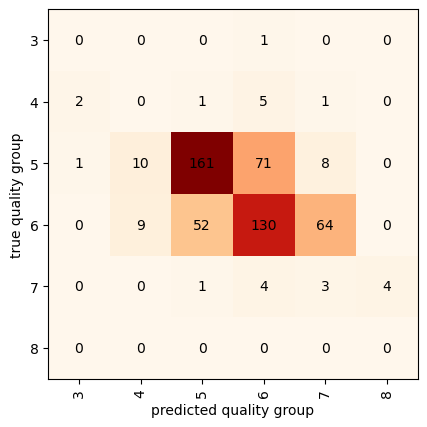

In [35]:
predictors = ['residual sugar','alcohol','pH']

X = create_matrix(predictors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

print('Accuracy score:',accuracy_score(y_pred,y_test))

mat = confusion_matrix(y_pred, y_test) # creates confusion matrix: test.target are the true labels, 

conf_matrix(mat)
x = classification_report(y_test,y_pred,zero_division= False)
print(x)

### b. Kmeans

In [36]:
# fig, ax = plt.subplots(figsize = (15,7))
# ax.set_xlabel(predictors[0])
# ax.set_ylabel(predictors[1])

# colors = ['red','orange','purple','cornflowerblue','brown','grey']
# for i,j in zip(labels, colors):
#     ax.scatter(X_test[y_test == i][:, 0], X_test[y_test== i][:, 1],
#                label = 'true label {i}'.format(i = i), marker = '*',color = j, s=50);
#     ax.scatter(X_test[y_pred == i][:, 0], X_test[y_pred == i][:, 1],
#                label = 'predicted label {i}'.format(i = i), color = j, s=50);
# ax.set_title('Redidual sugar and alcohol relationship',fontsize = 20)
# # ax.set_xlim(1,4)
# ax.legend();

In [37]:
warnings.filterwarnings(action='ignore', message='Mean of empty slice')
warnings.filterwarnings(action='ignore', message='invalid value encountered in true_divide')

In [38]:
# new_mat = []
# for i,j in zip(mat,range(len(mat))):
#     x = np.argmax(i)
#     temp = mat[:,x].copy()
#     mat[:,x] = mat[:,j].copy()
#     mat[:,j] = temp.copy()
#     for z in i:
#         new_mat.append(z)
        
# new_mat = np.array(new_mat).reshape(6,6)
# conf_matrix(new_mat)


Accuracy score: 0.5568181818181818
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00         3
         4.0       1.00      0.00      0.00        19
         5.0       0.58      0.81      0.68       215
         6.0       0.53      0.56      0.54       211
         7.0       1.00      0.00      0.00        76
         8.0       1.00      0.00      0.00         4

    accuracy                           0.56       528
   macro avg       0.85      0.23      0.20       528
weighted avg       0.64      0.56      0.49       528



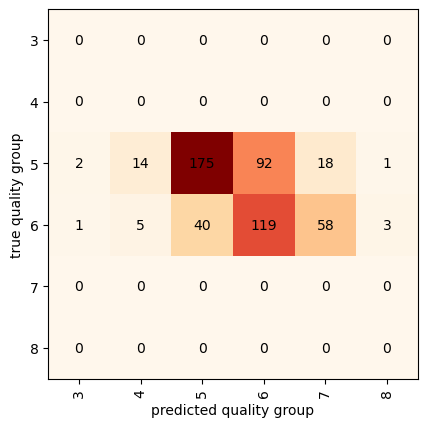

In [39]:
kmeans = KMeans(n_clusters=6) # hyperparameter
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 3
    elif(y_pred[i] == 1):
        y_pred[i] = 4
    elif(y_pred[i] == 2):
        y_pred[i] = 5
    elif(y_pred[i] == 3):
        y_pred[i] = 6
    elif(y_pred[i]== 4):
        y_pred[i] = 7
    else: 
        y_pred[i] = 8
        
pred = y_test.copy()
for i in labels:
    mask = (y_pred == i)  
    pred[mask] = mode(y_test[mask],keepdims = True)[0][0]
        
mat = confusion_matrix(pred, y_test)

conf_matrix(mat)
        
print('Accuracy score:',accuracy_score(pred,y_test))
x = classification_report(y_test, pred, zero_division= True)
print(x)

## 2. Predictor components are residual sugar, alcohol, fixed acidity, total sulfur dioxide, sulphates, and pH
Let's have more predictors to potentially increase the accuracy score!

## a. Decision Tree Clasifier

Accuracy score: 0.63125
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         8
         5.0       0.68      0.76      0.72       137
         6.0       0.57      0.67      0.62       127
         7.0       0.68      0.33      0.44        40
         8.0       0.00      0.00      0.00         6

    accuracy                           0.63       320
   macro avg       0.32      0.29      0.30       320
weighted avg       0.60      0.63      0.61       320



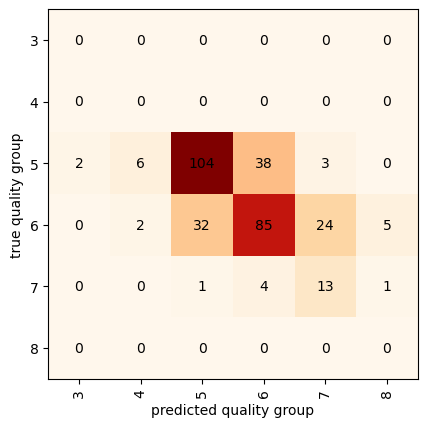

In [40]:
predictors = ['residual sugar','alcohol','fixed acidity','total sulfur dioxide','sulphates','pH']

X = create_matrix(predictors)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
pred_y = tree.predict(X_test)
pred_y

print('Accuracy score:',accuracy_score(pred_y,y_test))

mat = confusion_matrix(pred_y, y_test)
conf_matrix(mat)

x = classification_report(y_test,pred_y,zero_division= False)
print(x)

Accuracy score: 0.496875
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00         2
         4.0       1.00      0.00      0.00         8
         5.0       0.62      0.48      0.54       137
         6.0       0.44      0.73      0.55       127
         7.0       1.00      0.00      0.00        40
         8.0       1.00      0.00      0.00         6

    accuracy                           0.50       320
   macro avg       0.84      0.20      0.18       320
weighted avg       0.61      0.50      0.45       320



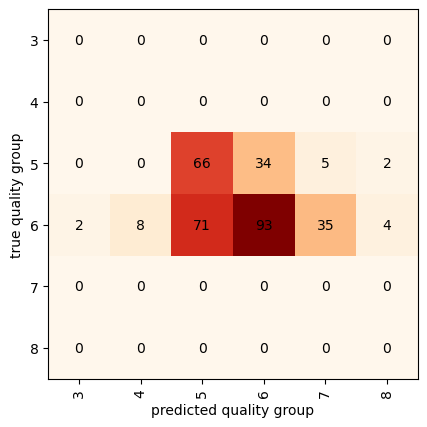

In [41]:
kmeans = KMeans(n_clusters=6) # hyperparameter
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 3
    elif(y_pred[i] == 1):
        y_pred[i] = 4
    elif(y_pred[i] == 2):
        y_pred[i] = 5
    elif(y_pred[i] == 3):
        y_pred[i] = 6
    elif(y_pred[i]== 4):
        y_pred[i] = 7
    else: 
        y_pred[i] = 8
        
pred = y_test.copy()
for i in labels:
    mask = (y_pred == i)  
    pred[mask] = mode(y_test[mask],keepdims = True)[0][0]
        
mat = confusion_matrix(pred, y_test)

conf_matrix(mat)
        
print('Accuracy score:',accuracy_score(pred,y_test))
x = classification_report(y_test, pred, zero_division= True)
print(x)


In general, having more predictors does not improve the acuracy significantly

## 3. Smote
### a. Smote and Decisision Tree Classifier

In [42]:
# conda install -c conda-forge imbalanced-learn

Accuracy score: 0.5378973105134475
              precision    recall  f1-score   support

         3.0       0.64      0.63      0.63       145
         4.0       0.51      0.54      0.53       127
         5.0       0.47      0.50      0.49       130
         6.0       0.29      0.31      0.30       141
         7.0       0.63      0.48      0.54       133
         8.0       0.72      0.75      0.74       142

    accuracy                           0.54       818
   macro avg       0.54      0.54      0.54       818
weighted avg       0.54      0.54      0.54       818



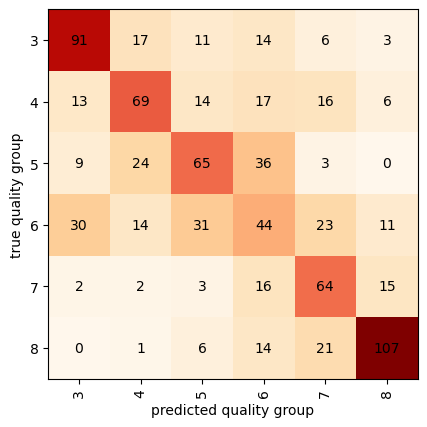

In [51]:
smote = SMOTE()

predictors = ['residual sugar','alcohol']

X = create_matrix(predictors)

X_fitted, y_fitted = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_fitted, y_fitted, test_size=0.20)

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
pred_y = tree.predict(X_test)
print('Accuracy score:',accuracy_score(pred_y,y_test))

mat = confusion_matrix(pred_y, y_test)

conf_matrix(mat)

x = classification_report(y_test,pred_y)
print(x)

### b. Smote and K-Means

Accuracy score: 0.33007334963325186
              precision    recall  f1-score   support

         3.0       0.42      0.21      0.28       129
         4.0       0.38      0.02      0.04       132
         5.0       0.30      0.76      0.43       137
         6.0       1.00      0.00      0.00       142
         7.0       0.25      0.47      0.33       137
         8.0       0.49      0.51      0.50       141

    accuracy                           0.33       818
   macro avg       0.47      0.33      0.26       818
weighted avg       0.48      0.33      0.26       818



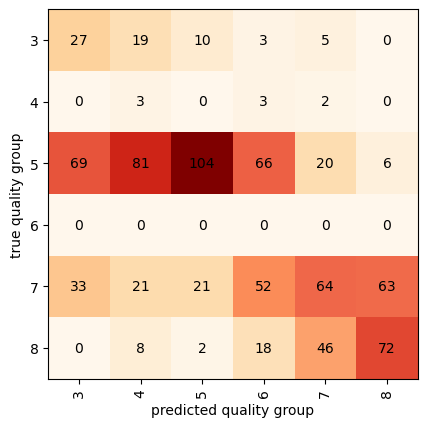

In [44]:
kmeans = KMeans(n_clusters=6) # hyperparameter
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 3
    elif(y_pred[i] == 1):
        y_pred[i] = 4
    elif(y_pred[i] == 2):
        y_pred[i] = 5
    elif(y_pred[i] == 3):
        y_pred[i] = 6
    elif(y_pred[i]== 4):
        y_pred[i] = 7
    else: 
        y_pred[i] = 8
        
pred = y_test.copy()
for i in labels:
    mask = (y_pred == i)  
    pred[mask] = mode(y_test[mask],keepdims = True)[0][0]
        
mat = confusion_matrix(pred, y_test)

conf_matrix(mat)
        
print('Accuracy score:',accuracy_score(pred,y_test))
x = classification_report(y_test, pred, zero_division= True)
print(x)

Accuracy score: 0.5965770171149144
              precision    recall  f1-score   support

         3.0       0.89      0.63      0.73       126
         4.0       0.51      0.74      0.61       153
         5.0       0.58      0.46      0.51       143
         6.0       0.29      0.17      0.21       132
         7.0       0.54      0.73      0.62       136
         8.0       0.81      0.85      0.83       128

    accuracy                           0.60       818
   macro avg       0.60      0.60      0.59       818
weighted avg       0.60      0.60      0.58       818



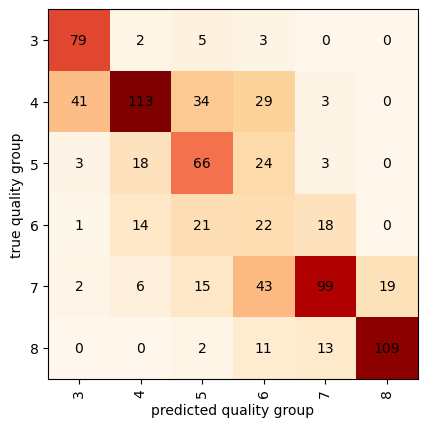

In [52]:
predictors = ['residual sugar','alcohol','fixed acidity','total sulfur dioxide','sulphates','pH']

X = create_matrix(predictors)

X_fitted, y_fitted = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_fitted, y_fitted, test_size=0.20)

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
pred_y = tree.predict(X_test)
print('Accuracy score:',accuracy_score(pred_y,y_test))

mat = confusion_matrix(pred_y, y_test)

conf_matrix(mat)
x = classification_report(y_test,pred_y,zero_division= True)
print(x)

Accuracy score: 0.2823960880195599
              precision    recall  f1-score   support

         3.0       0.31      0.77      0.45       126
         4.0       0.23      0.36      0.28       153
         5.0       0.42      0.29      0.34       143
         6.0       1.00      0.00      0.00       132
         7.0       0.22      0.28      0.25       136
         8.0       1.00      0.00      0.00       128

    accuracy                           0.28       818
   macro avg       0.53      0.28      0.22       818
weighted avg       0.52      0.28      0.22       818



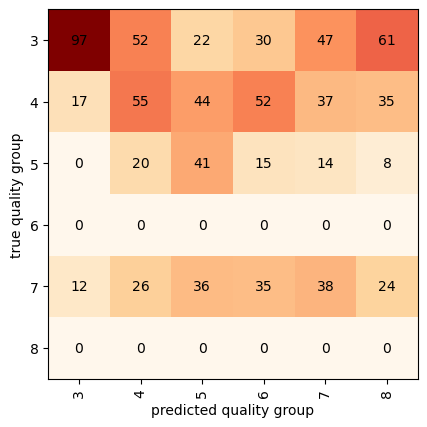

In [53]:
kmeans = KMeans(n_clusters=6) # hyperparameter
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 3
    elif(y_pred[i] == 1):
        y_pred[i] = 4
    elif(y_pred[i] == 2):
        y_pred[i] = 5
    elif(y_pred[i] == 3):
        y_pred[i] = 6
    elif(y_pred[i]== 4):
        y_pred[i] = 7
    else: 
        y_pred[i] = 8
        
pred = y_test.copy()
for i in labels:
    mask = (y_pred == i)  
    pred[mask] = mode(y_test[mask],keepdims = True)[0][0]
        
mat = confusion_matrix(pred, y_test)

conf_matrix(mat)
        
print('Accuracy score:',accuracy_score(pred,y_test))
x = classification_report(y_test, pred, zero_division= True)
print(x)

## 5. Losgistic Regression

In [55]:
predictors = ['residual sugar','alcohol','fixed acidity','total sulfur dioxide','sulphates','pH']

X = create_matrix(predictors)

y = []
for i in df['quality']:
    if i in ['3','4','5']:
        y.append('low quality')
    else:
        y.append('high quality')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression(fit_intercept=True)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Accuracy score:',accuracy_score(y_pred,y_test))

Accuracy score: 0.740625


In [30]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


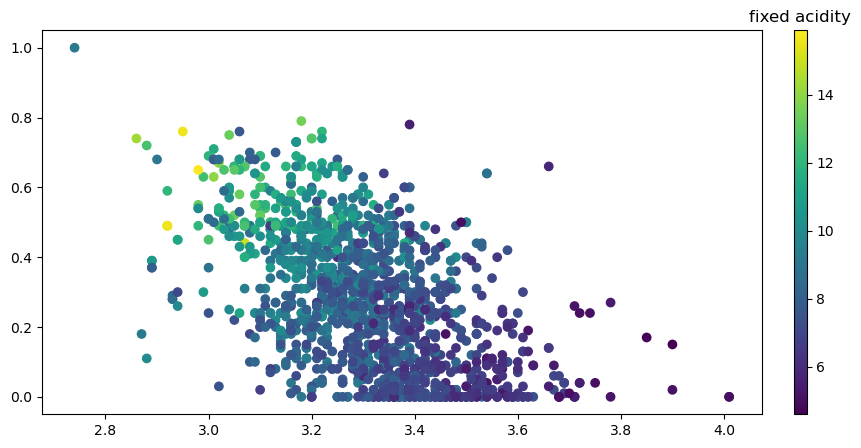

In [56]:
response = df1['fixed acidity']
predictors = ['pH','citric acid' ]

X = create_matrix(predictors)
fig, ax = plt.subplots()

plt.scatter(X[:,0],X[:,1],c = response);

plt.subplots_adjust(bottom=0.1, right=1.25, top=0.9)
ax = plt.axes([1.3, 0.1, 0.02, 0.8])
plt.colorbar(cax = ax);
plt.title('fixed acidity');

Mean Squared Error:  1.1142529771325331
R squared:           0.588
Adjusted R squared:  0.586


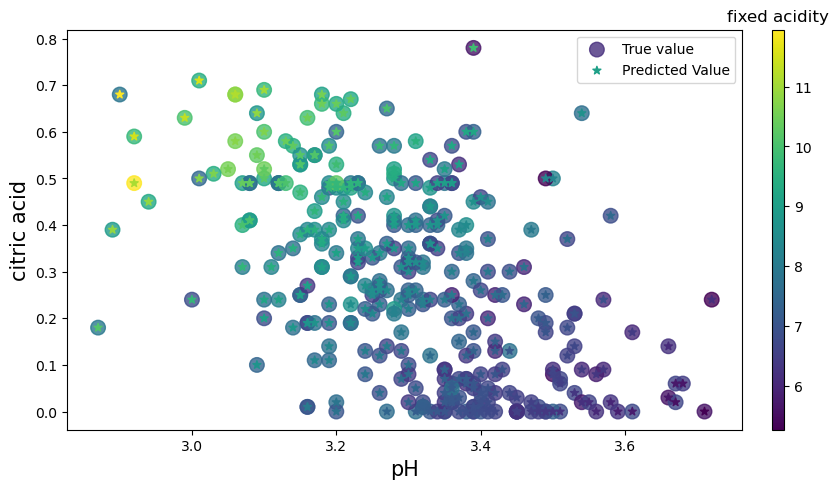

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, response, test_size=0.20)
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize = (6,5))

plt.scatter(X_test[:,0],X_test[:,1], c = y_test,s = 110 , label = 'True value',alpha = .8);
plt.scatter(X_test[:,0],X_test[:,1], c = y_pred,marker = "*", label = 'Predicted Value');
ax.set_xlabel('pH',fontsize = 15)
ax.set_ylabel('citric acid',fontsize = 15)
ax.legend()

plt.subplots_adjust(bottom=0.1, right=1.25, top=0.9)
ax = plt.axes([1.3, 0.1, 0.02, 0.8])
plt.colorbar(cax = ax);
plt.title('fixed acidity');


from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred, squared=False)

r2_score= r2_score(y_test, y_pred)
print('Mean Squared Error: ' , mse)
print('R squared:          ', round(r2_score,3))
print('Adjusted R squared: ', round(1 - (1-r2_score)*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1),3))